In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import kagglehub
from collections import Counter


<h1>Задание 1</h1>


<h2>Задание 1.1</h2>

In [ ]:
# Download dataset

path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + '/shopping_trends.csv')
df

100%|██████████| 146k/146k [00:00<00:00, 29.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


Гипотезы, проверяемые ниже:
*   Чем старше человек, тем более дорогие покупки он совершает
*   Те, кто сделали больше покупок на сервисе, готовы тратить больше денег
*   Чем больше люди до этого покупали, тем они более лояльны (ставят оценки выше)


Корреляция Пирсона между Возраст и Стоимость покупки: -0.01


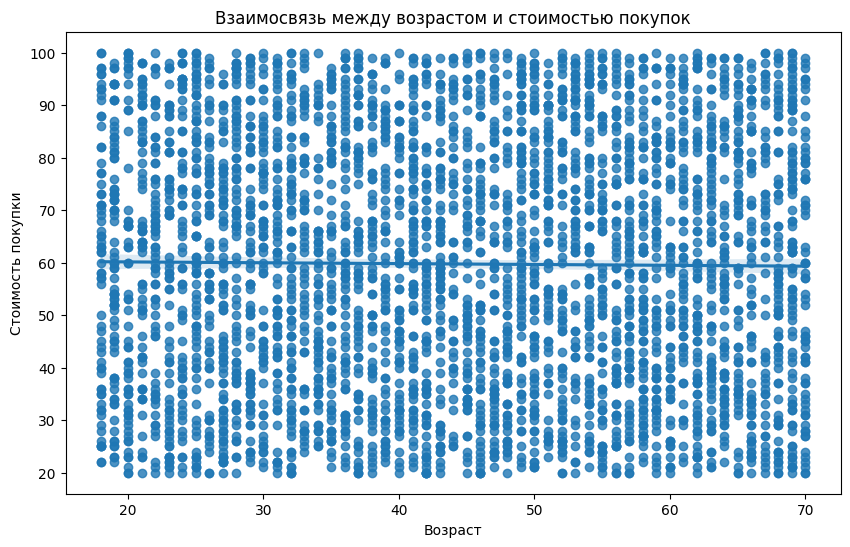

Гипотеза: те, кто сделали больше покупок на сервисе, готовы тратить больше денег
Корреляция Пирсона между Количеством предыдущих покупок и Стоимость покупки: 0.01


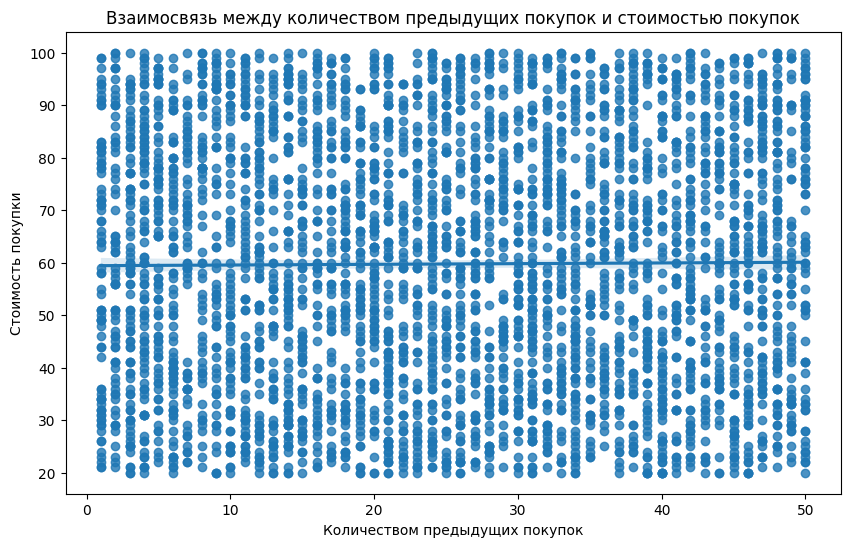

Корреляция Пирсона между Количеством предыдущих покупок и Оценка товара: 0.00


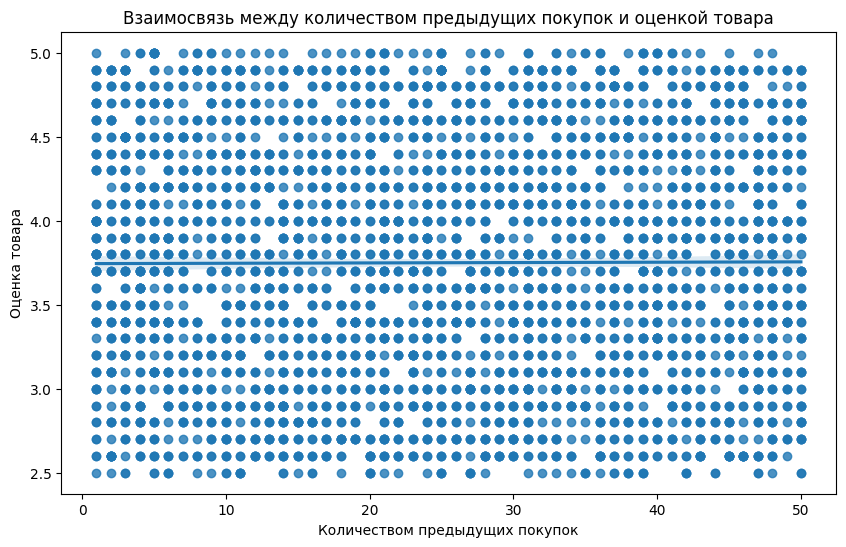

In [ ]:
def analyze_correlation(df, x_col, y_col, x_label, y_label, plot_title):
    """
    Функция для вычисления корреляции Пирсона и визуализации данных.
    """
    # Вычисление корреляции Пирсона
    pearson_corr, _ = pearsonr(df[x_col], df[y_col])
    print(f"Корреляция Пирсона между {x_label} и {y_label}: {pearson_corr:.2f}")

    # Визуализация
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x_col, y=y_col, data=df, marker='o')
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

print('Гипотеза: чем старше человек, тем более дорогие покупки он совершает ')
analyze_correlation(
    df,
    x_col='Age',
    y_col='Purchase Amount (USD)',
    x_label='Возраст',
    y_label='Стоимость покупки',
    plot_title='Взаимосвязь между возрастом и стоимостью покупок'
)

print('Гипотеза: те, кто сделали больше покупок на сервисе, готовы тратить больше денег')
analyze_correlation(
    df,
    x_col='Previous Purchases',
    y_col='Purchase Amount (USD)',
    x_label='Количеством предыдущих покупок',
    y_label='Стоимость покупки',
    plot_title='Взаимосвязь между количеством предыдущих покупок и стоимостью покупок'
)

print('Гипотеза: чем больше люди до этого покупали, тем они более лояльны (ставят оценки выше) ')
analyze_correlation(
    df,
    x_col='Previous Purchases',
    y_col='Review Rating',
    x_label='Количеством предыдущих покупок',
    y_label='Оценка товара',
    plot_title='Взаимосвязь между количеством предыдущих покупок и оценкой товара'
)

**Вывод**: коэффицент корелляции везде около нуля и на графиках корелляции не видно, гипотезы не подтвердилсь

**Гипотеза**: женщины чаще покупают одежду


In [ ]:
contingency_table_percentage = pd.crosstab(df['Gender'], df['Category'], normalize='index')

print("Доля по полу:")
print(contingency_table_percentage)

Доля по полу:
Category  Accessories  Clothing  Footwear  Outerwear
Gender                                              
Female       0.314103  0.445513  0.159455   0.080929
Male         0.319759  0.445324  0.150830   0.084087


**`Вывод`**: видно, что доля мужчин и женщин, покупающих одежду примерно одинаковая, значит гипотеза не подтвердилась  

**Гипотеза**: Люди из Калифорнии чаще покупают летнюю одежду

In [ ]:
df_part = df[(df['Location'] == 'California')]

contingency_table_percentage = pd.crosstab(df_part['Location'], df_part['Season'], normalize='index')

print("Доля по сезону:")
print(contingency_table_percentage)

Доля по сезону:
Season          Fall    Spring    Summer    Winter
Location                                          
California  0.284211  0.242105  0.242105  0.231579


**Вывод**: видно, что доля одежды по сезонам примерно одинаковая, значит гипотеза не подтвердилась  

<h2>Задание 1.2</h2>

Самый популярный товар:
0     Blouse
1    Jewelry
2      Pants
Name: Item Purchased, dtype: object


<ipython-input-72-2fe560264419>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y= gender_counts.values, palette='pastel')


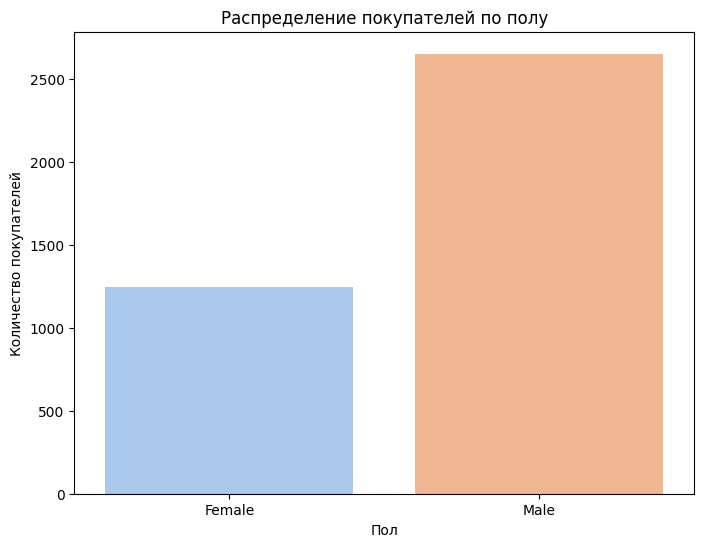

In [ ]:
### 1.2.1 и 1.2.2

most_popular_product = df['Item Purchased'].mode()
print(f"Самый популярный товар:\n{most_popular_product}")

gender_counts = df.groupby("Gender")['Customer ID'].count()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y= gender_counts.values, palette='pastel')
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.show()


In [ ]:
### 1.2.3
"""
  Вычислим 75 перцентиль и товары на сумму, больше 75 перцентиля будем считатьыми сам дорогими.
  Далее разобьём товары на две категории: меньше 75 перцентиля и больше (Above_75_Quantile)
  Посмотрим в какой категории чаще покупают по полу и возрасту
"""

def analyze_expensive_purchase(df, group_by_column, quantile=0.75):
    quantile_value = df['Purchase Amount (USD)'].quantile(quantile)
    df['Above_75_Quantile'] = df['Purchase Amount (USD)'] > quantile_value

    distribution = df.groupby([group_by_column, 'Above_75_Quantile']).size().unstack(fill_value=0)
    distribution_percent = distribution.div(distribution.sum(axis=1), axis=0) * 100

    category_with_highest_above_75 = distribution_percent[True].idxmax()
    highest_percentage = distribution_percent[True].max()

    print(f"{group_by_column}, который покупает больше всего, чаще всего, самые дорогие товары: {category_with_highest_above_75}")

analyze_expensive_purchase(df, 'Gender')
analyze_expensive_purchase(df, 'Age')


Gender, который покупает больше всего, чаще всего, самые дорогие товары: Female
Age, который покупает больше всего, чаще всего, самые дорогие товары: 53


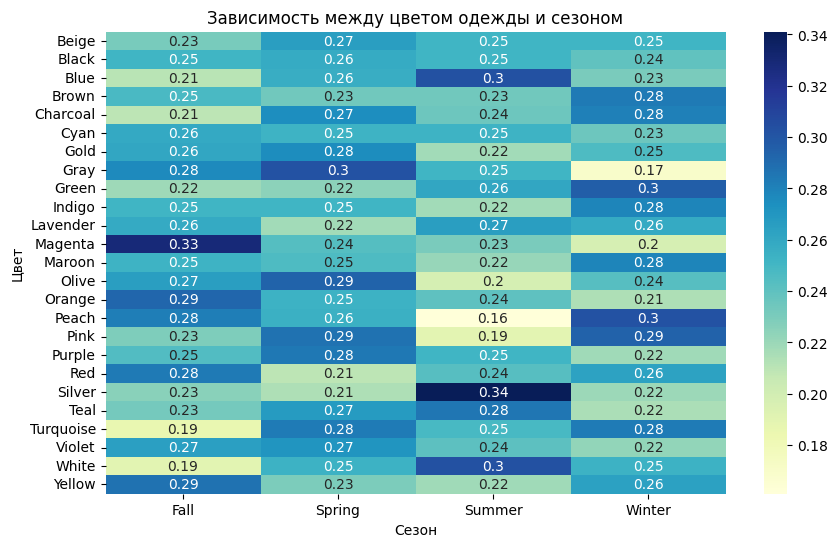

In [ ]:
### 1.2.4

color_season_table = pd.crosstab(df['Color'], df['Season'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(color_season_table, annot=True, cmap='YlGnBu')
plt.title('Зависимость между цветом одежды и сезоном')
plt.xlabel('Сезон')
plt.ylabel('Цвет')
plt.show()

**Вывод**: видно, что хотя некотрые цвета популярнее в определённые сезоны, доля всех цветов от 0.18 до 0.34. Поэтому нельзя сказать, что есть зависимость

<ipython-input-70-8e638df5e17b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='MAU', data=seasonal_mau, palette='viridis')


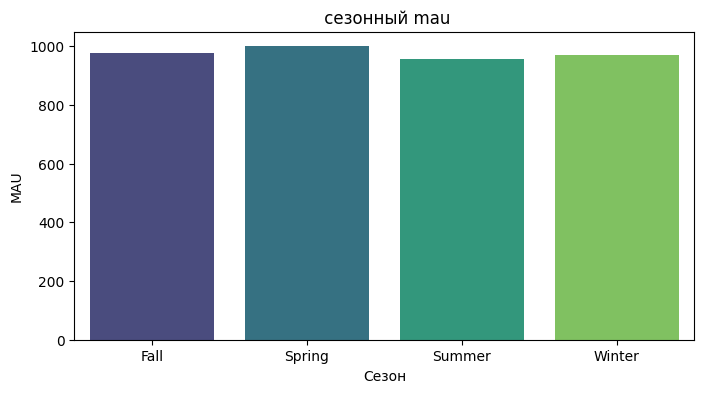

In [ ]:
### 1.2.5
seasonal_mau = df.groupby('Season')['Customer ID'].nunique().reset_index()
seasonal_mau.columns = ['Season', 'MAU']

plt.figure(figsize=(8, 4))
sns.barplot(x='Season', y='MAU', data=seasonal_mau, palette='viridis')
plt.title(' сезонный mau')
plt.xlabel('Сезон')
plt.ylabel('MAU')
plt.show()

In [ ]:
### 1.2.6

product_names = ''.join(df['Item Purchased']).lower()
product_names= "".join(c for c in product_names if c.isalpha())
most_popular_char = Counter(product_names).most_common(1)[0][0]
print(f'Cамая популярная буква в названии одежды {most_popular_char}')

Cамая популярная буква в названии одежды s


<h1>Задание 2</h1>


In [96]:
df_alco = pd.read_csv('drinks.csv')
most_popular_beer = (df_alco[['country', 'beer_servings']].sort_values( by = 'beer_servings',  ascending=False))['country'].iloc[0]
most_popular_spirit = (df_alco[['country', 'spirit_servings']].sort_values( by = 'spirit_servings',  ascending=False))['country'].iloc[0]
most_popular_wine = (df_alco[['country', 'wine_servings']].sort_values( by = 'wine_servings',  ascending=False))['country'].iloc[0]

print(f'В {most_popular_beer} люди пьют больше пива')
print(f'В {most_popular_spirit} люди пьют больше spirit')
print(f'В {most_popular_wine} люди пьют больше вина')

В Namibia люди пьют больше пива
В Grenada люди пьют больше spirit
В France люди пьют больше вина


<h1>Задание 3</h1>



In [98]:
df = pd.read_csv('tarantino.csv')
df

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


In [99]:
group_df = df.groupby(['movie', 'type']).size().reset_index(name='counts')
pivot_data = group_df.pivot_table(index='movie', columns='type', values='counts', fill_value=0).reset_index()
pivot_data = pivot_data.rename(columns={'word': 'curses'})
pivot_data['curses/death'] = pivot_data['curses'] / pivot_data['death']
print("Число проклятий, летальных исходов и их соотношение по фильмам\n")
pivot_data

Число проклятий, летальных исходов и их соотношение по фильмам



type,movie,death,curses,curses/death
0,Django Unchained,47.0,262.0,5.574468
1,Inglorious Basterds,48.0,58.0,1.208333
2,Jackie Brown,4.0,368.0,92.000000
3,Kill Bill: Vol. 1,63.0,57.0,0.904762
4,Kill Bill: Vol. 2,11.0,69.0,6.272727
5,Pulp Fiction,7.0,469.0,67.000000
6,Reservoir Dogs,10.0,421.0,42.100000


In [100]:
df_word = df.loc[(df['type'] == 'word')]
group_df = df.groupby(['word']).size().reset_index(name='counts')
print("Частота употребления конкретных проклятий:\n")
group_df.sort_values('counts', ascending=False)

Частота употребления конкретных проклятий:



,word,counts
28,fucking,407
49,shit,221
22,fuck,213
46,n-word,179
0,ass,140
31,goddamn,113
43,motherfucker,70
7,bitch,64
35,hell,45
15,damn,37


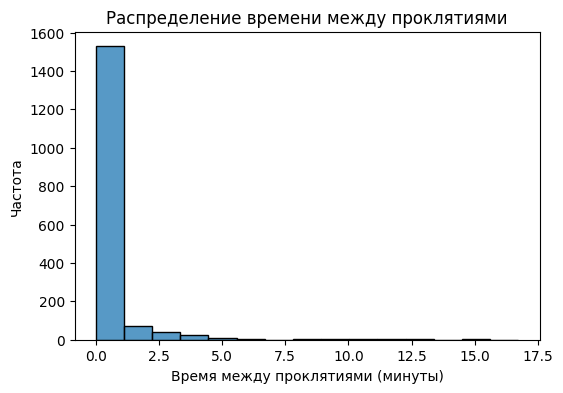

In [114]:
word_df = df[df['type'] == 'word']
word_df

word_df = word_df.sort_values(by=['movie', 'minutes_in'])
word_df['diff_time'] = word_df.groupby('movie')['minutes_in'].diff()

time_diffs = word_df['diff_time'].dropna()

plt.figure(figsize=(6, 4))
sns.histplot(time_diffs, bins=15)
plt.title('Распределение времени между проклятиями')
plt.xlabel('Время между проклятиями (минуты)')
plt.ylabel('Частота')
plt.show()